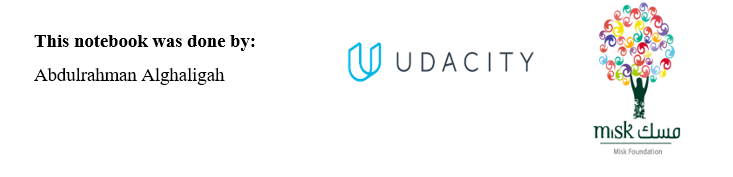


# Project: Investigate TMDb movie Dataset                                             

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains information about 10,000 movies collected from The Movie Database. There are important columns that we can take advantage of to investigate a significant information to provide it to movies producers. 

In this report I am going to analyse this dataset starting from cleaning it up to make clear visualisations to provide accurate conclusions to three questions which are:

- Which genres are the most popular?
- What kinds of properties are associated with movies that have high revenues?
- Does the movies high budget receive more votes?


In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I am going to load in the data, check for cleanliness, and then trim and clean  dataset for analysis.

### General Properties

Loading the dataset:
    

In [2]:
df=pd.read_csv('tmdb-movies.csv')# loading the data



Print out a few lines:
    

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now, I am going to check for duplicates rows and removing them if any:

In [4]:
df. duplicated().sum() # this line for checking if there is a duplicate row in the set


1

The previous cell output shows that there is one duplicate row, which I am going to drop in the next cell.

In [5]:
df.drop_duplicates(inplace = True)# dropping duplicate row

Now let's verify:

In [6]:
df. duplicated().sum()

0

Let's check the columns in the dataset and drop the one that we don't need in our analysis:

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Columns like: id, imdb_id and homepage are not necessary for our analysis <br>let's remove any unnecessary column:

In [8]:
df.drop(['imdb_id','homepage','id','cast','original_title','director','overview','production_companies','keywords'],inplace=True,axis=1) #drooping unnecessary columns

Now let's verify:

In [9]:
df.columns

Index(['popularity', 'budget', 'revenue', 'tagline', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [10]:
df.head()

,popularity,budget,revenue,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now let's check if there is a missing values in the dataset:

In [8]:
df.isnull().sum()# view missing value count for each column


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's remove the missing values:

In [9]:
df.dropna(inplace=True)# drop rows with missing values

Checks if there are any null values:

In [10]:
df.isnull().sum().any()

False

Let's check the data type of the columns:

In [11]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

They are all fine except release_year column which need to be converted to datetime type:

In [12]:
df['release_date']=pd.to_datetime(df['release_date']) # converting release_year from string to datetime

let's check the type of release_year after converting it:

In [13]:
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Let's check revenue and budget columns:

In [14]:
df['revenue']


0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
            ...    
10724      81974493
10759      70000000
10760     141000000
10817        321952
10819      78000000
Name: revenue, Length: 1992, dtype: int64

In [15]:
df['budget']


0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10724      7000000
10759       300000
10760      2700000
10817            0
10819            0
Name: budget, Length: 1992, dtype: int64

There are some values with 0 let's replace them by the mean of each of them:

In [16]:
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())# replacing the z values in the revenue column by the mean
df['budget']=df['budget'].replace(0,df['budget'].mean())# replacing the z values in the budgetmn by the mean


Let's check now:

In [17]:
df['revenue']

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
             ...     
10724    8.197449e+07
10759    7.000000e+07
10760    1.410000e+08
10817    3.219520e+05
10819    7.800000e+07
Name: revenue, Length: 1992, dtype: float64

In [18]:
df['budget']

0        1.500000e+08
1        1.500000e+08
2        1.100000e+08
3        2.000000e+08
4        1.900000e+08
             ...     
10724    7.000000e+06
10759    3.000000e+05
10760    2.700000e+06
10817    3.454924e+07
10819    3.454924e+07
Name: budget, Length: 1992, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

 Now that we  trimmed and cleaned the data , it is time to move on to do exploration.


### Research Question 1  Which genres are the most popular?


Firstly let's check how genres column looks like:

In [19]:
ques1=df ## declaring a varaible for research question 1

ques1['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10724                    Adventure|Action|Thriller
10759                              Horror|Thriller
10760                                       Comedy
10817                            Documentary|Music
10819                                Action|Comedy
Name: genres, Length: 1992, dtype: object

We can see clearly here there are some rows with multiple geners, let's get rid of them:  

In [20]:
ques1['genres']=ques1['genres'].apply(lambda g : g.split('|')[0])
ques1['genres']

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10724      Adventure
10759         Horror
10760         Comedy
10817    Documentary
10819         Action
Name: genres, Length: 1992, dtype: object

Now let's group them by the genres and take the popularity for each of them:

In [21]:
g_popularity=ques1.groupby(['genres'])['popularity'].mean()
g_popularity

genres
Action             1.986913
Adventure          2.579849
Animation          1.581842
Comedy             0.880423
Crime              1.327691
Documentary        0.268144
Drama              0.989608
Family             1.380851
Fantasy            1.754675
History            1.345724
Horror             0.754793
Music              0.423895
Mystery            1.422963
Romance            1.303659
Science Fiction    2.338259
TV Movie           0.377490
Thriller           1.024357
War                1.588715
Western            3.699665
Name: popularity, dtype: float64

Now let's visualize the previous cell:

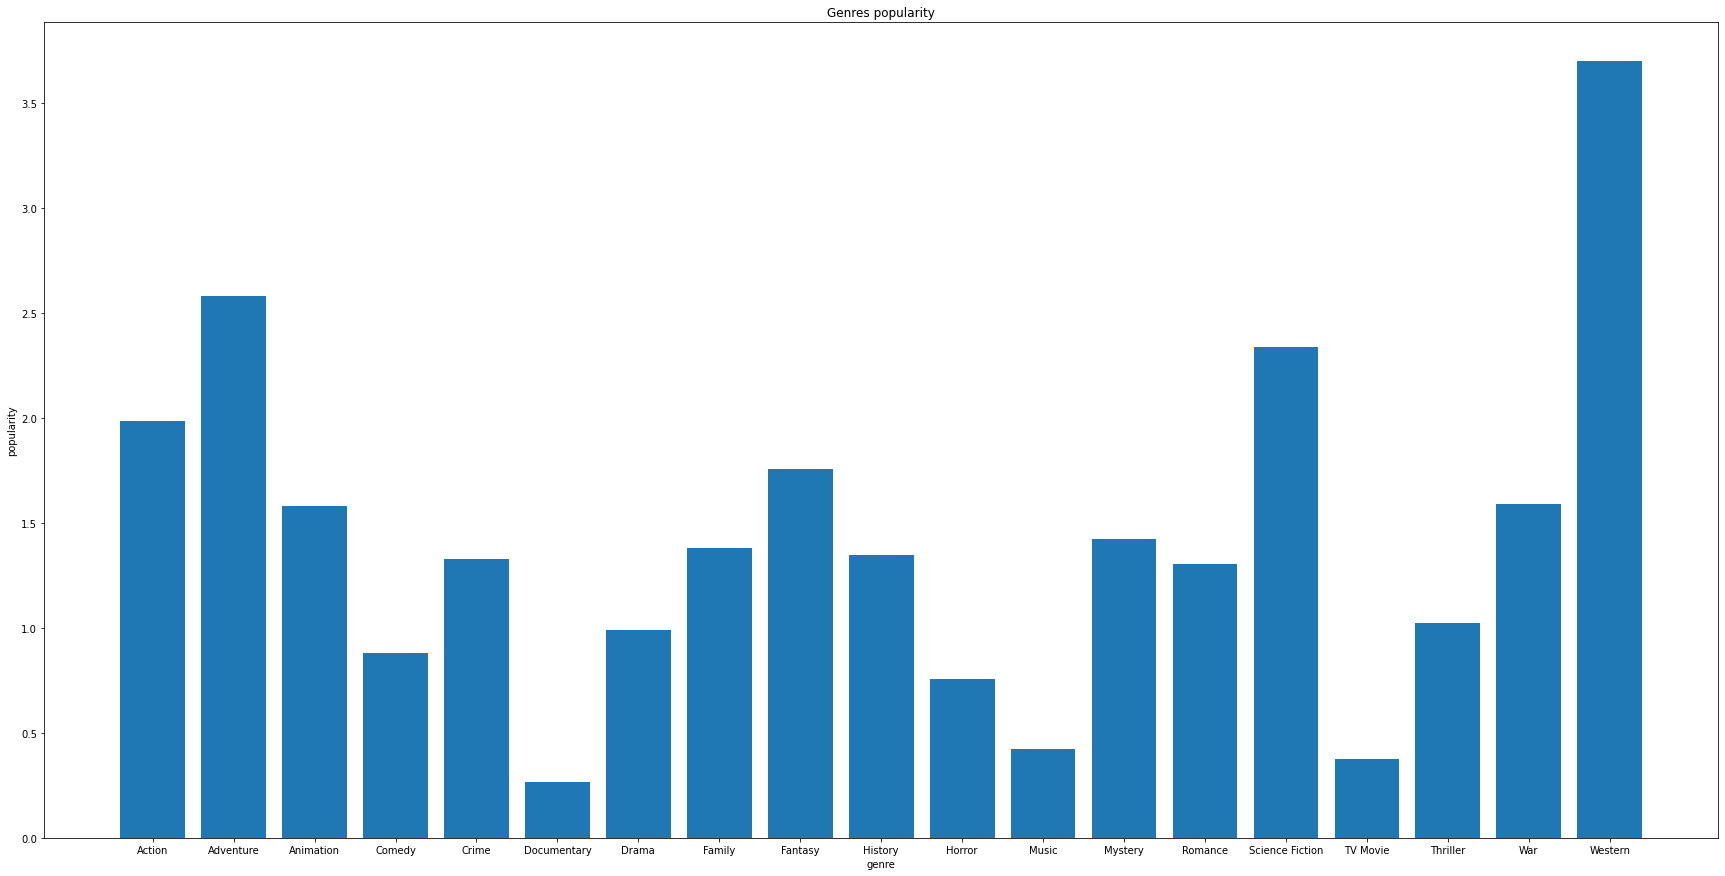

In [22]:
plt.subplots(figsize=(30,15))
plt.title('Genres popularity')
plt.xlabel('genre')
plt.ylabel('popularity')
plt.bar(g_popularity.index,g_popularity);

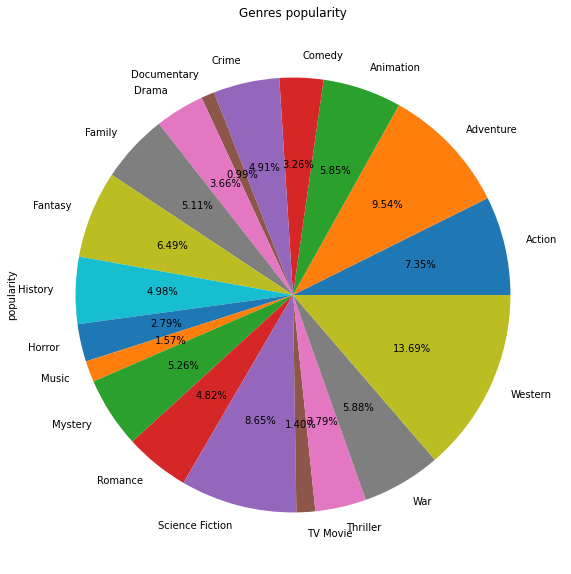

In [23]:
sizes= [1500, 600, 500, 300]
g_popularity.plot.pie(y=g_popularity.index,figsize=(10,10),autopct='%1.2f%%')
plt.title('Genres popularity');

 Clearly we can see that Adventure and Science fiction genres are the most popular.        

### Research Question 2 What kinds of properties are associated with movies that have high revenues?



Firstly we have to find find the highest movies in revenues:

In [24]:
highest_movies_revenues=df.sort_values(by=['revenue']).tail(100) # in this line we took the last 100 movies after sorting them by revenue in ascending order
highest_movies_revenues.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
23,216015,tt2322441,4.710402,40000000.0,569651467.0,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,https://www.facebook.com/fiftyshadesofgreymovie,Sam Taylor-Johnson,Are you curious?,...,When college senior Anastasia Steele steps in ...,125,Drama,Focus Features|Trigger Street Productions|Mich...,2015-02-11,1865,5.3,2015,3.679998e+07,5.240791e+08
7987,1892,tt0086190,4.828854,32350000.0,572700000.0,Return of the Jedi,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Richard Marquand,The Empire Falls...,...,As Rebel leaders map their strategy for an all...,135,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,1983-05-23,3101,7.8,1983,7.082424e+07,1.253819e+09
2877,1726,tt0371746,4.977955,140000000.0,585174222.0,Iron Man,Robert Downey Jr.|Terrence Howard|Jeff Bridges...,http://www.ironmanmovie.com/,Jon Favreau,Heroes aren't born. They're built.,...,"After being held captive in an Afghan cave, bi...",126,Action,Marvel Studios,2008-04-30,6220,7.3,2008,1.417901e+08,5.926566e+08
5483,49519,tt0481499,1.432796,135000000.0,585178928.0,The Croods,Nicolas Cage|Emma Stone|Ryan Reynolds|Catherin...,http://www.thecroodsmovie.com/,Kirk De Micco|Chris Sanders,Meet the first modern family.,...,The Croods is a prehistoric comedy adventure t...,98,Adventure,DreamWorks Animation,2013-03-20,1755,6.8,2013,1.263645e+08,5.477470e+08
7392,6479,tt0480249,2.692916,150000000.0,585349010.0,I Am Legend,Will Smith|Alice Braga|Charlie Tahan|Salli Ric...,http://iamlegend.warnerbros.com/,Francis Lawrence,The last man on Earth is not alone,...,Robert Neville is a scientist who was unable t...,101,Drama,Village Roadshow Pictures|Original Film|Weed R...,2007-12-14,3013,6.8,2007,1.577503e+08,6.155932e+08


Now let's draw histograms for some features to check which properties are associated with movies that have high revenues:

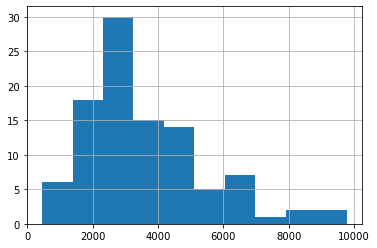

In [25]:
highest_movies_revenues.vote_count.hist();

It seems that higher revenue movies receive vote count between 2200 and 4000 votes.

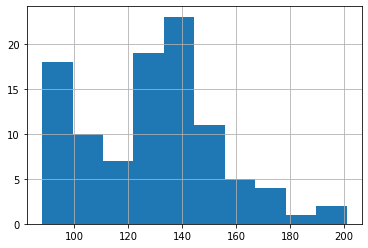

In [26]:
highest_movies_revenues.runtime.hist();

Higher revenue movies have run time between 130 and 140 min.

### Research Question 3: Does the movies high budget receive more votes?




let's first check the budget column:

In [27]:
df['budget'].sort_values()

3581            1.0
3065            1.0
2398            3.0
6460           10.0
9992           30.0
           ...     
4411    260000000.0
14      280000000.0
7387    300000000.0
3375    380000000.0
2244    425000000.0
Name: budget, Length: 1992, dtype: float64

clearly we can see that  there are some movies with 1 or 2 budget which does not make sense, let's drop any budget that small than 1000:

In [42]:
ques3=df[df['budget']>=1000] # declare a new variable and drop any budget that is small than 100
ques3['budget'].sort_values()

7044         7000.0
4806         8000.0
3755         8000.0
4836        10400.0
7447        15000.0
           ...     
1929    260000000.0
14      280000000.0
7387    300000000.0
3375    380000000.0
2244    425000000.0
Name: budget, Length: 1982, dtype: float64

let's sort the data by  budget:

In [43]:
ques3.sort_values(by='budget')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7044,14337,tt0390384,0.856329,7000.0,4.247600e+05,Primer,Shane Carruth|David Sullivan|Casey Gooden|Anan...,http://www.primermovie.com,Shane Carruth,What happens if it actually works?,...,Friends/fledgling entrepreneurs invent a devic...,79,Science Fiction,Thinkfilm,2004-10-08,341,6.9,2004,8.081118e+03,4.903622e+05
4806,138941,tt2149360,0.159747,8000.0,1.152153e+08,Found,Gavin Brown|Ethan Philbeck|Phyllis Munro|Louie...,http://www.foundmovie.net/,Scott Schirmer,My brother keeps a human head in his closet...,...,Marty is the ideal fifth grader. He gets good ...,105,Thriller,The October People|Forbidden Films,2012-03-30,16,6.6,2012,7.597954e+03,0.000000e+00
3755,79120,tt1714210,0.243777,8000.0,4.699470e+05,Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,After a drunken house party with his straight ...,96,Drama,EM Media|The Bureau|Glendale Picture Company|S...,2011-09-22,96,7.4,2011,7.755184e+03,4.555657e+05
4836,157305,tt2391009,0.134777,10400.0,1.152153e+08,Head Over Heels,Nigel Anthony|Ruth Rayyah McCaul,http://www.headoverheelsfilm.com,Timothy Reckart,Sometimes you can't agree which way is up.,...,"After many years of marriage, Walter and Madge...",10,Family,National Film and Television School (NFTS),2012-05-24,10,6.6,2012,9.877341e+03,0.000000e+00
7447,23827,tt1179904,1.120442,15000.0,1.933558e+08,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,"After a young, middle class couple moves into ...",86,Horror,Blumhouse Productions|Solana Films,2007-09-14,714,6.1,2007,1.577503e+04,2.033462e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,38757,tt0398286,2.865684,260000000.0,5.917949e+08,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation,Walt Disney Pictures|Walt Disney Animation Stu...,2010-11-24,2019,7.3,2010,2.600000e+08,5.917949e+08
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
7387,285,tt0449088,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09
3375,1865,tt1298650,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08


Now let's divide the budget into two groups:

We will first get the median of the budget column

In [33]:
median=ques3['budget'].median()
median

34549235.94076305

Now let's split the budget into two groups, low budget and high budget:

In [44]:
low = ques3.query('budget < {}'.format(median)) # low: budget that are less than median
high = ques3.query('budget >= {}'.format(median))#high: budget that are more than or euqal to median

mean_budget_low = low['vote_count'].mean() # taking the mean of low budget movies
mean_budget_high = high['vote_count'].mean() # taking the mean of high budget movies

Now let's compare between the two groups:

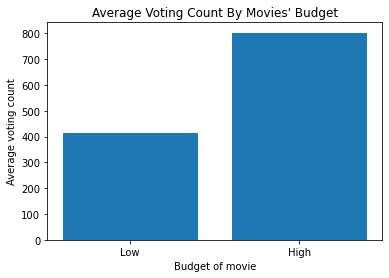

In [45]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Voting Count By Movies\' Budget')
plt.xlabel('Budget of movie')
plt.ylabel('Average voting count');

The above Bar plot shows that higher budget movies receive better voting.

<a id='conclusions'></a>
## Conclusions

### Resarch Question 1 
- Adventure and Science fiction genres have the most popularity.
- TV movie, Documentary and Forign genres have the lowst popularity. 

### Resarch Question 2
- The most revenuable movies are not the one with highest voting count. 
- Most of the higher revenue movies have run time between 130-140 minutes.

### Resarch Question 3
- The higher budget that movie will have the more voting that it will receive.